**Introduction:**
I am importing all the necessary libraries in order to complete this project. I am using the TMDB movie set. I am asking the following questions: 



1. Is there a relationship between revenue and popularity
2. Finding out if there is a relationship between runtime and popularity
3. Finding out if there is a relationship between vote average and popularity
4. Which genre of movies have the longest runtime
5. Which genres of movies have the highest average vote count
6. Finding out which directors have directed the most movies
7. Finding out the producers that have produced the most movies based on the dataset
8. Properties of movies that have the highest popularity


In [55]:
import pandas as pd


In [56]:
import seaborn as sns

In [57]:
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('tmdb-movies.csv')

Uploading the CSV file

In [59]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

**Data Wrangling:** Performing Data Clean Up

In [61]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [62]:
sum(df.duplicated())

1

Dropping duplicates

In [63]:
df.drop_duplicates(inplace=True)

Drop Irrelevant Columns not needed

In [64]:
def drop_unecessary_columns(column_name):
  df.drop(column_name,axis=1,inplace=True)
  return df;


In [65]:
list_unecessary_columns = ['tagline','keywords','overview','imdb_id','homepage','cast','id']

In [67]:
for x in list_unecessary_columns:
  drop_unecessary_columns(x)
  

In [69]:
df.dropna(inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9806 non-null   float64
 1   budget                9806 non-null   int64  
 2   revenue               9806 non-null   int64  
 3   original_title        9806 non-null   object 
 4   director              9806 non-null   object 
 5   runtime               9806 non-null   int64  
 6   genres                9806 non-null   object 
 7   production_companies  9806 non-null   object 
 8   release_date          9806 non-null   object 
 9   vote_count            9806 non-null   int64  
 10  vote_average          9806 non-null   float64
 11  release_year          9806 non-null   int64  
 12  budget_adj            9806 non-null   float64
 13  revenue_adj           9806 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.1+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f704bb7d090>,
      dtype=object)

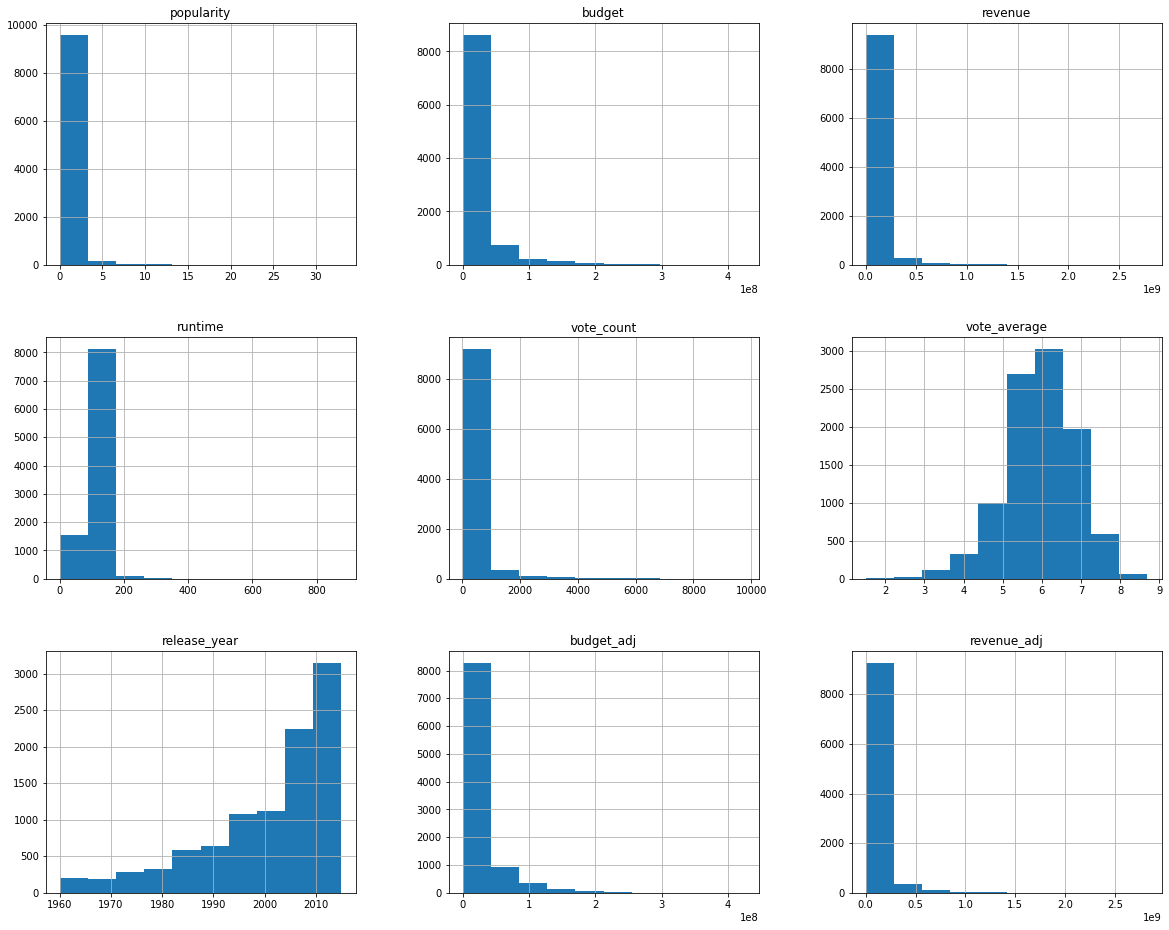

In [71]:
df.hist(figsize=(20,16))

In [ ]:
#Split  the | columns with multiple values

In [72]:



def split_columns(column_name):
  df[column_name] = df[column_name].apply(lambda x: x.split('|')[0])
  return df[column_name]





In [73]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [74]:
#replacing zeroes 

In [75]:
#loop to replace zeros with the mean
removeZeroList = ['budget','popularity','revenue','revenue_adj','runtime','vote_count','vote_average','budget_adj']
for item in removeZeroList:
  df[item] = df[item].replace(0,df[item].mean())

In [76]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


**Exploratory Data Analysis:** Some of the questions that I want to answer include the following:
1. Is there a relationship between revenue and popularity
2.Finding out if there is a relationship between runtime and popularity
3.Finding out if there is a relationship between vote average and popularity
4.Which genre of movies have the longest runtime
5.Which genres of movies have the highest average vote count
6.Finding out which directors have directed the most movies
7.Properties of movies that have the highest popularity


I am going to find out if there is a relationship between the reveneue a movie generated and its popularity

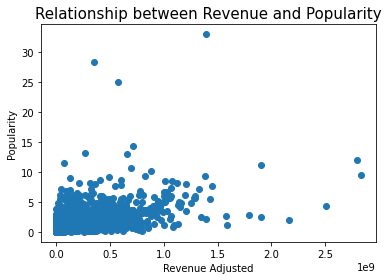

In [77]:
#finding out if there is a relationship between the revenue and the popularity

plt.xlabel("Revenue Adjusted")
plt.ylabel("Popularity")
plt.title("Relationship between Revenue and Popularity",fontsize=15)
plt.scatter(df['revenue_adj'], df['popularity'])#


Finding out if there is a correlation between runtime and popularity

---



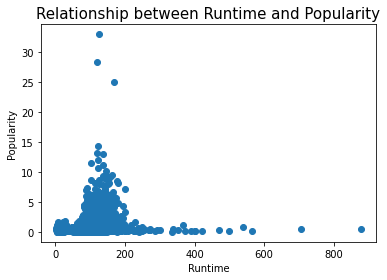

In [78]:
plt.xlabel("Runtime")
plt.ylabel("Popularity")
plt.title("Relationship between Runtime and Popularity",fontsize=15)
plt.scatter(df['runtime'], df['popularity'])


I am going to find out if there is a relationship between vote count and popularity

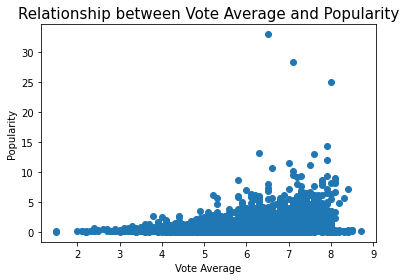

In [81]:

plt.xlabel("Vote Average")
plt.ylabel("Popularity")
plt.title("Relationship between Vote Average and Popularity",fontsize=15)



plt.scatter(df['vote_average'], df['popularity'])

plt.show()


I am going to find out what genres of movies have the longest runtime

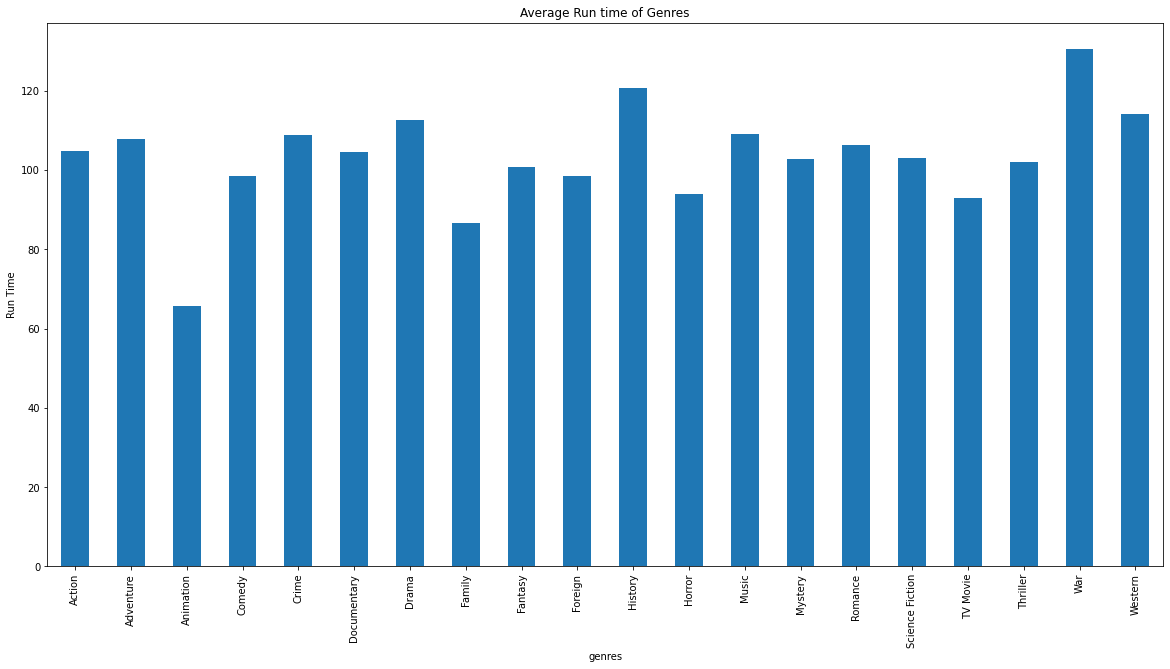

In [80]:
#see what genres of movies have the longest runtime
dfg = df.groupby(split_columns('genres'))[('runtime')].mean()
ax = dfg.plot.bar(figsize=(20, 10), ylabel='Run Time')
plt.title('Average Run time of Genres')
plt.show()

I am going to see what generes have the highest vote average[link text](https://)

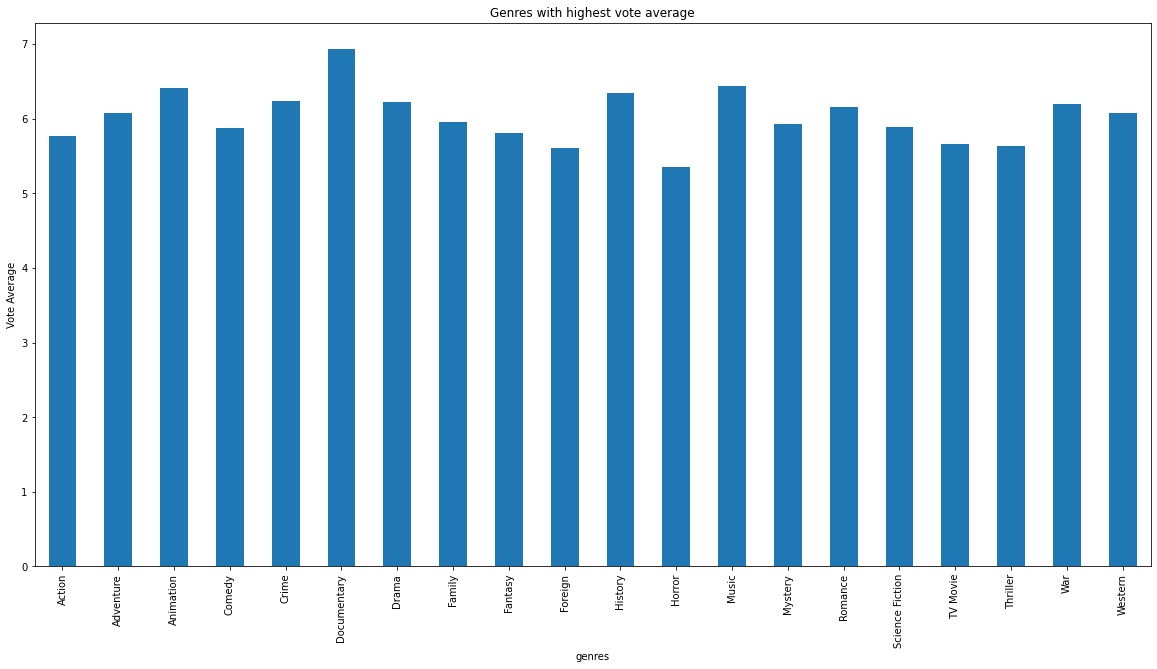

In [82]:

dfg = df.groupby(split_columns('genres'))['vote_average'].mean()

# plot the groupby result
ax = dfg.plot.bar(figsize=(20, 10), ylabel='Vote Average')
plt.title("Genres with highest vote average")
plt.show()

I am going to find out which directors have the most movies in the file

Text(0.5, 1.0, 'Directors with the most movies')

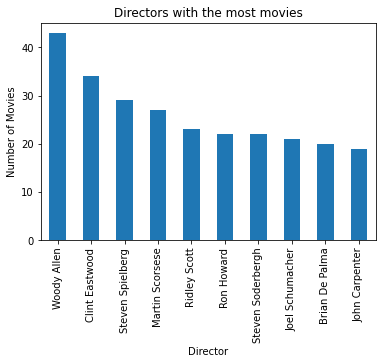

In [83]:
#finding out the directors who have the most movies in the file
top_10 = split_columns('director').value_counts()[:10]
top_10.plot.bar(xlabel="Director", ylabel="Number of Movies")
plt.title('Directors with the most movies')

Below, I am going to find the top 10 movies produced by a production company

In [84]:
#find the most production companies in the file


split_columns('production_companies').value_counts()[:10]

Universal Pictures                        460
Paramount Pictures                        426
Columbia Pictures                         271
Twentieth Century Fox Film Corporation    242
Walt Disney Pictures                      213
New Line Cinema                           206
Warner Bros.                              172
Miramax Films                             132
TriStar Pictures                          121
Columbia Pictures Corporation             119
Name: production_companies, dtype: int64

In the remaning cells down below, I am going to find out the properties of movies that have the highest popularity

In [ ]:

sorted_popularity_biggest = df.sort_values(by=['popularity'], ascending = False).head(200)
sorted_popularity_biggest.head(2)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action,Universal Studios,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action,Village Roadshow Pictures,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


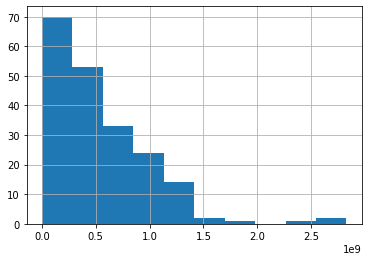

In [ ]:
sorted_popularity_biggest.revenue_adj.hist()

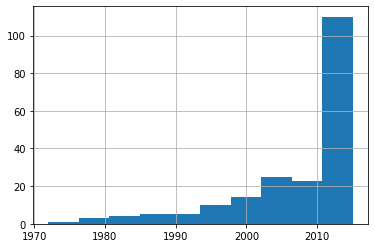

In [ ]:
sorted_popularity_biggest.release_year.hist()

**Conclusions After Analysis:**

1. For my first question, I wanted to see if there was a relationship between revenue and popularity. Based on the findings, there is not a strong relationship

2. For my second question, I wanted to see if there was a relationship between runtime and popularity, but there is not a strong one based on the scatter plot

3. For my third question, I wanted to see the relationship between vote average and popularity of all the movies. After analysis, at lower values there appears to be a trend, but the trend weakens later

4. For my fourth question, I wanted to see what the genres of movies have the longest runtime on average. From my analysis, I noticed that war movies have the longest runtime

5. For my fifth question, I wanted to see what genres had the highest vote average totals. From my analysis, it appears that documentaries have the highest vote average totals

6. For my sixth question, I wanted to see the top 10 movie directors. The number one director with the most movies was Woody Allen

7. For my seventh question, I wanted to see the top 10 movie producers. They were the following:

 Universal Pictures                        460
 Paramount Pictures                        426
 Columbia Pictures                         271
 Twentieth Century Fox Film Corporation    242
 Walt Disney Pictures                      213
 New Line Cinema                           206
 Warner Bros.                              172
 Miramax Films                             132
 TriStar Pictures                          121
 Columbia Pictures Corporation             119

8. For my last question, I wanted to see the attributes that made movies popular: the most popular movies had a revenue around $250,000,000. The most pouplar movies also were released after 2010


Some limitation of the analysis: 
1. There are gaps in the data, so it cannot paint a clear picture. 

2. Some of the trends that are shown may have some correlation, but that doesn't mean that they cause each other.

3. Since several records were deleted/dropped due to bad formatting issues and gaps in data, this is not certain. 
4. The file obviously does not have all the movies that exist, so results are 100% accurate. 


Overall conclusion:
1. The file included several movies, but there were limitations to the analysis since many rows were deleted due to missing  info and the data cleaning process.

2. The charts may not be accurate since there is missing data

3. However, there was plenty of data after the clean up to perform an analysis. 

4. I think there was sufficient data to perform an analysis, but I would also like to try it out with a larger file with more movie entries. 
